In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import seaborn as sns
# sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [2]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aasth\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\aasth\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\aasth\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\aasth\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [4]:
df = pd.read_csv(r"C:\Users\aasth\Downloads\metajob_metadata_extraction\IT.csv")
df.head()

,title,description,job_url
0,Java Software Developer (m/w/d),Fundierte Kenntnisse in der objektorientierten...,https://www.metajob.at/dres/jc?p=001oy9401pvzcx
1,Senior Software Developer (m/w/d),Eine erfolgreich abgeschlossene höhere IT-Ausb...,https://www.metajob.at/dres/jc?p=001oy940hdb1uf
2,Softwareentwickler*innen C# und Angular - 80% ...,Was erwartet dich … Du arbeitest in einem agil...,https://www.metajob.at/dres/jc?p=000bdrqt63thvf
3,IT-Mitarbeiter (m/w/d),Eine erfolgreich abgeschlossene IT-Ausbildung ...,https://www.metajob.athttps://www.sprungbrett....
4,Full-Stack Software Developer - C# .NET,Beste Qualität sowie eine hohe Kundenorientier...,https://www.metajob.at/dres/jc?p=000bdrqtlwbcj9


In [5]:
df.shape

(2000, 3)

In [6]:
def cleanDescription(descText):
    descText = descText.lower() #converting to lowercase
    descText = re.sub('http\S+\s*', ' ', descText)  # remove URLs
    descText = re.sub('RT|cc', ' ', descText)  # remove RT and cc
    descText = re.sub('#\S+', '', descText)  # remove hashtags
    descText = re.sub('@\S+', '  ', descText)  # remove mentions
    descText = re.sub(r'[0-9]', '', descText) # remove numbers
    descText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', descText)  # remove punctuations
    #descText = re.sub(r'[^\x00-\x7f]',r' ', descText) # remove non Non ASCII CHarecter
    descText = re.sub('\s+', ' ', descText)  # remove extra whitespace
    return descText 

In [7]:
df['cleaned_re'] = df['description'].apply(lambda x:cleanDescription(x))
df.head() 

,title,description,job_url,cleaned_re
0,Java Software Developer (m/w/d),Fundierte Kenntnisse in der objektorientierten...,https://www.metajob.at/dres/jc?p=001oy9401pvzcx,fundierte kenntnisse in der objektorientierten...
1,Senior Software Developer (m/w/d),Eine erfolgreich abgeschlossene höhere IT-Ausb...,https://www.metajob.at/dres/jc?p=001oy940hdb1uf,eine erfolgreich abgeschlossene höhere it ausb...
2,Softwareentwickler*innen C# und Angular - 80% ...,Was erwartet dich … Du arbeitest in einem agil...,https://www.metajob.at/dres/jc?p=000bdrqt63thvf,was erwartet dich … du arbeitest in einem agil...
3,IT-Mitarbeiter (m/w/d),Eine erfolgreich abgeschlossene IT-Ausbildung ...,https://www.metajob.athttps://www.sprungbrett....,eine erfolgreich abgeschlossene it ausbildung ...
4,Full-Stack Software Developer - C# .NET,Beste Qualität sowie eine hohe Kundenorientier...,https://www.metajob.at/dres/jc?p=000bdrqtlwbcj9,beste qualität sowie eine hohe kundenorientier...


In [8]:
def text_clean_2(text):
  stop_words = set(stopwords.words('english'))
  word_tokens = word_tokenize(text)
  filtered_sentence = []
  wnl = WordNetLemmatizer()
 
  for w in word_tokens:
      if w not in stop_words:
          filtered_sentence.append(w)
  lemmatized_string = ' '.join([wnl.lemmatize(words) for words in filtered_sentence])
  return lemmatized_string         
  #return filtered_sentence

In [9]:
df['cleaned_text'] = df['cleaned_re'].apply(lambda x:text_clean_2(x))
df.head(2)

,title,description,job_url,cleaned_re,cleaned_text
0,Java Software Developer (m/w/d),Fundierte Kenntnisse in der objektorientierten...,https://www.metajob.at/dres/jc?p=001oy9401pvzcx,fundierte kenntnisse in der objektorientierten...,fundierte kenntnisse der objektorientierten pr...
1,Senior Software Developer (m/w/d),Eine erfolgreich abgeschlossene höhere IT-Ausb...,https://www.metajob.at/dres/jc?p=001oy940hdb1uf,eine erfolgreich abgeschlossene höhere it ausb...,eine erfolgreich abgeschlossene höhere ausbild...


In [10]:
#getting the entire resume text
corpus=" "
for i in range(0,532):
    corpus= corpus+ df["cleaned_text"][i]

In [11]:
import nltk
from nltk.corpus import stopwords
sw_nltk = stopwords.words('german')

alpha_word = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n' 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
#new_word = ['un', 'ber', 'sowie','erfahrung','al','innen','de','au','sungen','bereich', 'bieten', 'kenntnisse','gute','benefit', 'ab','service', 'arbeiten','kunden','flexible', 'unternehmen','bewerben', 'wien', 'office','experience','eur', 'technologien','unterst','unserer', 'ausbildung', 'position', 'qualifikation', 'work', 'job', 'mitarbeiter', 'aufgaben','bi', 'teil','design','online', 'freuen','glichkeiten','web', 'vollzeit', 'weiterentwicklung', 'arbeitszeiten','u', 'h', 'gmbh', 'working', 'bewerbung','test', 'pers', 'brutto','suchen','brz','hast','qualit','glich','htl','je','home', 'business','mehr','system','glichkeit', 'technology','engineering', 'solution', 'gerne','gehalt','vorteil','gro','technische','fh','neue', 'gemeinsam','skill','umsetzung','abgeschlossene','homeoffice','sterreich','berzahlung','www','international','dabei', 'ngig','bzw', 'nnen', 'partner','know', 'zusammenarbeit','anforderungen','tzen','gesch','etc', 'higkeit', 'recruiting', 'zukunft', 'neuen','englischkenntnisse', 'interesse','tzung', 'level', 'hrung','linz','knowledge','company', 'time','mitarbeit','integration','abh', 'full', 'weitere', 'profil','new','event', 'applikationen','erste','erfahrungen','austria','internationalen','verg','bringen','standort','kannst', 'basis','sofort','menschen','leben', 'verst','life','group', 'gr','weiterbildung', 'stack','verf','tzt', 'net', 'salary','uni','monat','erm', 'bereichen','graz','mindestens','kontakt','arbeit','environment','anwendungen']
new_word = ['abhängig', 'unterstützung', 'möglich', 'mehrjährige', 'unterstützt', 'unterstützen','durchführung', 'österreich','möglichkeit', 'lösungen', 'überzahlung', '•','berufserfahrung','un', 'ber', 'sowie','erfahrung','al','innen','de','au','sungen','bereich', 'bieten', 'kenntnisse','gute','benefit', 'ab','service', 'arbeiten','kunden','flexible', 'unternehmen','bewerben', 'wien', 'office','experience','eur', 'technologien','unterst','unserer', 'ausbildung', 'position', 'qualifikation', 'work', 'job', 'mitarbeiter', 'aufgaben','bi', 'teil','design','online', 'freuen','glichkeiten','web', 'vollzeit', 'weiterentwicklung', 'arbeitszeiten','u', 'h', 'gmbh', 'working', 'bewerbung','test', 'pers', 'brutto','suchen','brz','hast','qualit','glich','htl','je','home', 'business','mehr','system','glichkeit', 'technology','engineering', 'solution', 'gerne','gehalt','vorteil','gro','technische','fh','neue', 'gemeinsam','skill','umsetzung','abgeschlossene','homeoffice','sterreich','berzahlung','www','international','dabei', 'ngig','bzw', 'nnen', 'partner','know', 'zusammenarbeit','anforderungen','tzen','gesch','etc', 'higkeit', 'recruiting', 'zukunft', 'neuen','englischkenntnisse', 'interesse','tzung', 'level', 'hrung','linz','knowledge','company', 'time','mitarbeit','integration','abh', 'full', 'weitere', 'profil','new','event', 'applikationen','erste','erfahrungen','austria','internationalen','verg','bringen','standort','kannst', 'basis','sofort','menschen','leben', 'verst','life','group', 'gr','weiterbildung', 'stack','verf','tzt', 'net', 'salary','uni','monat','erm', 'bereichen','graz','mindestens','kontakt','arbeit','environment','anwendungen','liegt','st', 'erstellung','part','pr','mehrj','spannende', 'mindestgehalt','art','rund','ten','idealerweise','softwarel','bereitschaft','arbeitest','stellen','com','hrige','datenbanken','weltweit','ro','arbeitsweise','end', 'gesundheit','requirement','studium','qualifikationen', 'gt', 'selbstst','bringst','expert', 'arbeitsumfeld','karriere','jahre', 'angebot','regelm','bereits','offer','modernen', 'konzeption','umgang', 'ideen', 'onboarding', 'ren', 'architektur', 'implementierung', 'frau', 'ndige','high', 'good', 'customer', 'tech', 'chancengleichheit','en', 'user', 'inkl','mail','verantwortung','well''informationen','neuer','leidenschaft','rolle', 'erwartet','mobile','durchf','zahlreiche','arbeitsplatz', 'jahren','beim', 'kollektivvertrag','nstigungen','year','pro','top','freude', 'per','wiener', 'salzburg','weiterbildungen','process','gut','ffentliche','opportunity', 'ndig','hohe','betrieb','wissen','anbindung','glichen','kund','looking','aktiv','lebenslauf','welt', 'diverse','themen','wort','weiterbildungsm','lage','gesamten', 'balance', 'kv', 'sport', 'gross', 'geh', 'bietet','optimierung', 'like', 'platform','vielfalt','zusammen', 'apply', 'performance', 'schrift','stehen','ort','bewirb', 'gen', 'hour', 'based', 'quality', 'ansprechpartner','fundierte','state','innovativen','people', 'ansprechperson','tze', 'schwerpunkt','beko', 'qualification','individuelle','jahresbruttogehalt']

sw_nltk.extend(alpha_word)
sw_nltk.extend(new_word)

text = corpus
words = [word for word in text.split() if word.lower() not in sw_nltk]
sentence1 = " ".join(words)

#print(new_text)
print("Old length: ", len(text))
print("New length: ", len(sentence1))

Old length:  132948
New length:  86990


# Banking

In [12]:
df_bk = pd.read_csv(r"C:\Users\aasth\Downloads\metajob_metadata_extraction\banking.csv")
df_bk.head()

,title,description,job_url
0,Teamassistent*in - Bank,Die renommierte Bank mit zentral gelegenem un...,https://www.metajob.at/dres/jc?p=000bdrqtnp7aj3
1,Financial Reporting - Back Office Mitarbeiter*...,Maturant*innen und Jungakademiker*innen wird a...,https://www.metajob.at/dres/jc?p=000bdrqtlhzrdg
2,Private Banker:in (m/w/d),Umfassende Betreuung bestehender Kund:innen im...,https://www.metajob.at/dres/jc?p=000a57f5jp7k9t
3,Geschäftsleitung / Raiffeisenbank Aist (m/w/d),Ergebnisorientierte Steuerung der Bank mit Bed...,https://www.metajob.athttps://www.stepstone.at...
4,Bankstellenleiter:in (w/m/d),"Bankstelle Himberg, Anstellungsart: Vollzeit -...",https://www.metajob.at/dres/jc?p=000a5vwb9o49lf


In [13]:
df_1 = [df_bk]
df_1 = pd.concat([df_bk], ignore_index=True, sort=False)

In [14]:
df_1=df_1.drop("job_url", axis='columns')

In [15]:
def cleanDescription(descText):
    descText = descText.lower() #converting to lowercase
    descText = re.sub('http\S+\s*', ' ', descText)  # remove URLs
    descText = re.sub('RT|cc', ' ', descText)  # remove RT and cc
    descText = re.sub('#\S+', '', descText)  # remove hashtags
    descText = re.sub('@\S+', '  ', descText)  # remove mentions
    descText = re.sub(r'[0-9]', '', descText) # remove numbers
    descText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', descText)  # remove punctuations
    #descText = re.sub(r'[^\x00-\x7f]',r' ', descText) # remove non Non ASCII CHarecter
    descText = re.sub('\s+', ' ', descText)  # remove extra whitespace
    return descText

In [16]:
df_1['cleaned_re'] = df_1['description'].apply(lambda x:cleanDescription(x))
df_1.head() 

,title,description,cleaned_re
0,Teamassistent*in - Bank,Die renommierte Bank mit zentral gelegenem un...,die renommierte bank mit zentral gelegenem un...
1,Financial Reporting - Back Office Mitarbeiter*...,Maturant*innen und Jungakademiker*innen wird a...,maturant innen und jungakademiker innen wird a...
2,Private Banker:in (m/w/d),Umfassende Betreuung bestehender Kund:innen im...,umfassende betreuung bestehender kund innen im...
3,Geschäftsleitung / Raiffeisenbank Aist (m/w/d),Ergebnisorientierte Steuerung der Bank mit Bed...,ergebnisorientierte steuerung der bank mit bed...
4,Bankstellenleiter:in (w/m/d),"Bankstelle Himberg, Anstellungsart: Vollzeit -...",bankstelle himberg anstellungsart vollzeit ihr...


In [17]:
def text_clean_2(text):
  stop_words = set(stopwords.words('english'))
  word_tokens = word_tokenize(text)
  filtered_sentence = []
  wnl = WordNetLemmatizer()
 
  for w in word_tokens:
      if w not in stop_words:
          filtered_sentence.append(w)
  lemmatized_string = ' '.join([wnl.lemmatize(words) for words in filtered_sentence])
  return lemmatized_string         
  #return filtered_sentence

In [18]:
df_1['cleaned_text'] = df_1['cleaned_re'].apply(lambda x:text_clean_2(x))
df_1.head(2)

,title,description,cleaned_re,cleaned_text
0,Teamassistent*in - Bank,Die renommierte Bank mit zentral gelegenem un...,die renommierte bank mit zentral gelegenem un...,die renommierte bank mit zentral gelegenem und...
1,Financial Reporting - Back Office Mitarbeiter*...,Maturant*innen und Jungakademiker*innen wird a...,maturant innen und jungakademiker innen wird a...,maturant innen und jungakademiker innen wird h...


In [19]:
df_1=df_1.drop("cleaned_re", axis='columns')
df_1

,title,description,cleaned_text
0,Teamassistent*in - Bank,Die renommierte Bank mit zentral gelegenem un...,die renommierte bank mit zentral gelegenem und...
1,Financial Reporting - Back Office Mitarbeiter*...,Maturant*innen und Jungakademiker*innen wird a...,maturant innen und jungakademiker innen wird h...
2,Private Banker:in (m/w/d),Umfassende Betreuung bestehender Kund:innen im...,umfassende betreuung bestehender kund innen im...
3,Geschäftsleitung / Raiffeisenbank Aist (m/w/d),Ergebnisorientierte Steuerung der Bank mit Bed...,ergebnisorientierte steuerung der bank mit bed...
4,Bankstellenleiter:in (w/m/d),"Bankstelle Himberg, Anstellungsart: Vollzeit -...",bankstelle himberg anstellungsart vollzeit ihr...
...,...,...,...
1986,Förderungsmanager:in für Private Wohnen & Ener...,"Standort: Wien, 1090 - Bereich: Umwelt - Umfan...",standort wien bereich umwelt umfang vollzeit h...
1987,Firmenkundenbetreuer Mittelstand (m/w/d),"Sie betreuen eigentümergeführte, mittelständis...",sie betreuen eigentümergeführte mittelständisc...
1988,Firmenkundenbetreuer Immobilien & Bauträger (m...,Sie akquirieren & betreuen zielgerichtet Bautr...,sie akquirieren betreuen zielgerichtet bauträg...
1989,Partnerbetreuer (wmd),Auf- und Ausbau sowie regelmäßige Betreuung vo...,auf und ausbau sowie regelmäßige betreuung von...


In [20]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
 
stop_words = stopwords.words('german')
df_1['text_woStopwords'] = df_1['cleaned_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aasth\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
df_1=df_1.drop("title", axis='columns')
df_1=df_1.drop("description", axis='columns')
df_1=df_1.drop("cleaned_text", axis='columns')
df_1.head(2)

,text_woStopwords
0,renommierte bank zentral gelegenem gut erreich...
1,maturant innen jungakademiker innen hauptsitz ...


In [22]:
cell_text = print(df_1["text_woStopwords"].values[3])
print(cell_text)

ergebnisorientierte steuerung bank bedacht einhaltung aufsichtsrechtlicher vorgaben sowie raiffeisen werten strategische operative führung … führung coaching personalentwicklung mitarbeiterinnen
None


In [23]:
df_1.shape

(1991, 1)

In [24]:
#getting the entire resume text
Bank_corpus=" "
for i in range(0,1991):
    Bank_corpus= Bank_corpus+ df_1["text_woStopwords"][i]

In [25]:
import nltk
from nltk.corpus import stopwords
sw_nltk = stopwords.words('german')

alpha_word = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n' 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
#new_word = ['un', 'ber', 'sowie','erfahrung','al','innen','de','au','sungen','bereich', 'bieten', 'kenntnisse','gute','benefit', 'ab','service', 'arbeiten','kunden','flexible', 'unternehmen','bewerben', 'wien', 'office','experience','eur', 'technologien','unterst','unserer', 'ausbildung', 'position', 'qualifikation', 'work', 'job', 'mitarbeiter', 'aufgaben','bi', 'teil','design','online', 'freuen','glichkeiten','web', 'vollzeit', 'weiterentwicklung', 'arbeitszeiten','u', 'h', 'gmbh', 'working', 'bewerbung','test', 'pers', 'brutto','suchen','brz','hast','qualit','glich','htl','je','home', 'business','mehr','system','glichkeit', 'technology','engineering', 'solution', 'gerne','gehalt','vorteil','gro','technische','fh','neue', 'gemeinsam','skill','umsetzung','abgeschlossene','homeoffice','sterreich','berzahlung','www','international','dabei', 'ngig','bzw', 'nnen', 'partner','know', 'zusammenarbeit','anforderungen','tzen','gesch','etc', 'higkeit', 'recruiting', 'zukunft', 'neuen','englischkenntnisse', 'interesse','tzung', 'level', 'hrung','linz','knowledge','company', 'time','mitarbeit','integration','abh', 'full', 'weitere', 'profil','new','event', 'applikationen','erste','erfahrungen','austria','internationalen','verg','bringen','standort','kannst', 'basis','sofort','menschen','leben', 'verst','life','group', 'gr','weiterbildung', 'stack','verf','tzt', 'net', 'salary','uni','monat','erm', 'bereichen','graz','mindestens','kontakt','arbeit','environment','anwendungen']
new_word = ['berufserfahrung','un', 'ber', 'sowie','erfahrung','al','innen','de','au','sungen','bereich', 'bieten', 'kenntnisse','gute','benefit', 'ab','service', 'arbeiten','kunden','flexible', 'unternehmen','bewerben', 'wien', 'office','experience','eur', 'technologien','unterst','unserer', 'ausbildung', 'position', 'qualifikation', 'work', 'job', 'mitarbeiter', 'aufgaben','bi', 'teil','design','online', 'freuen','glichkeiten','web', 'vollzeit', 'weiterentwicklung', 'arbeitszeiten','u', 'h', 'gmbh', 'working', 'bewerbung','test', 'pers', 'brutto','suchen','brz','hast','qualit','glich','htl','je','home', 'business','mehr','system','glichkeit', 'technology','engineering', 'solution', 'gerne','gehalt','vorteil','gro','technische','fh','neue', 'gemeinsam','skill','umsetzung','abgeschlossene','homeoffice','sterreich','berzahlung','www','international','dabei', 'ngig','bzw', 'nnen', 'partner','know', 'zusammenarbeit','anforderungen','tzen','gesch','etc', 'higkeit', 'recruiting', 'zukunft', 'neuen','englischkenntnisse', 'interesse','tzung', 'level', 'hrung','linz','knowledge','company', 'time','mitarbeit','integration','abh', 'full', 'weitere', 'profil','new','event', 'applikationen','erste','erfahrungen','austria','internationalen','verg','bringen','standort','kannst', 'basis','sofort','menschen','leben', 'verst','life','group', 'gr','weiterbildung', 'stack','verf','tzt', 'net', 'salary','uni','monat','erm', 'bereichen','graz','mindestens','kontakt','arbeit','environment','anwendungen','liegt','st', 'erstellung','part','pr','mehrj','spannende', 'mindestgehalt','art','rund','ten','idealerweise','softwarel','bereitschaft','arbeitest','stellen','com','hrige','datenbanken','weltweit','ro','arbeitsweise','end', 'gesundheit','requirement','studium','qualifikationen', 'gt', 'selbstst','bringst','expert', 'arbeitsumfeld','karriere','jahre', 'angebot','regelm','bereits','offer','modernen', 'konzeption','umgang', 'ideen', 'onboarding', 'ren', 'architektur', 'implementierung', 'frau', 'ndige','high', 'good', 'customer', 'tech', 'chancengleichheit','en', 'user', 'inkl','mail','verantwortung','well''informationen','neuer','leidenschaft','rolle', 'erwartet','mobile','durchf','zahlreiche','arbeitsplatz', 'jahren','beim', 'kollektivvertrag','nstigungen','year','pro','top','freude', 'per','wiener', 'salzburg','weiterbildungen','process','gut','ffentliche','opportunity', 'ndig','hohe','betrieb','wissen','anbindung','glichen','kund','looking','aktiv','lebenslauf','welt', 'diverse','themen','wort','weiterbildungsm','lage','gesamten', 'balance', 'kv', 'sport', 'gross', 'geh', 'bietet','optimierung', 'like', 'platform','vielfalt','zusammen', 'apply', 'performance', 'schrift','stehen','ort','bewirb', 'gen', 'hour', 'based', 'quality', 'ansprechpartner','fundierte','state','innovativen','people', 'ansprechperson','tze', 'schwerpunkt','beko', 'qualification','individuelle','jahresbruttogehalt']

sw_nltk.extend(alpha_word)
sw_nltk.extend(new_word)

text = Bank_corpus
words = [word for word in text.split() if word.lower() not in sw_nltk]
sentence2 = " ".join(words)

#print(new_text)
print("Old length: ", len(text))
print("New length: ", len(sentence2 ))

Old length:  419662
New length:  350691


In [26]:
def common_words(sentence1, sentence2):
    # split the sentences into lists of words
    words1 = sentence1.split()
    words2 = sentence2.split()
    
    # use set intersection to get the common words
    common = set(words1).intersection(words2)
    
    # convert the set back to a list and return it
    return list(common)

# print(common_words(sentence1, sentence2))
Common_words = common_words(sentence1, sentence2)
Common_words

['beratung',
 'mitwirkung',
 'responsibility',
 'managementsystemen',
 'kernprozesse',
 'max',
 'aktivitäten',
 'land',
 'geräte',
 'kontinuierlichen',
 'technischer',
 'vielfältigen',
 'professionellen',
 'highly',
 'smartphone',
 'management',
 'bezug',
 'operative',
 'anfragen',
 'mysql',
 'iks',
 'physik',
 'implementation',
 'verantwortungsbewusstsein',
 'regelmäßige',
 'änderungen',
 'elektronische',
 'wochenstunden',
 'speziell',
 'verantworten',
 'zielorientierte',
 'individueller',
 'designing',
 'pflegen',
 'chance',
 'namhaften',
 'pair',
 'easy',
 'identity',
 'sicherstellen',
 'juristinnen',
 'kolleg',
 'banking',
 'guten',
 'büro',
 'planung',
 'support',
 'gehören',
 'jenkins',
 'front',
 'administrative',
 'technischen',
 'interdisziplinären',
 'ausgezeichnete',
 'source',
 'einfach',
 'folgenden',
 'journey',
 'sinne',
 'lebenszyklus',
 'anliegen',
 'analysierst',
 'microservices',
 'iso',
 'task',
 'realisieren',
 'einrichtung',
 'second',
 'innovationen',
 'abwechslu

In [33]:
UnwantedWords = ['max', 'easy', 'closely', 'responsibility', 'energie','land','highly','chance','react','tu','big','support','journey','need','_','source','unterstützt','vienna','feature','senior', 'unterstützen','durchführung', 'österreich','möglichkeit', 'lösungen', 'überzahlung']
sw_nltk.extend(Common_words)
sw_nltk.extend(UnwantedWords)

text = corpus
words = [word for word in text.split() if word.lower() not in sw_nltk]
NewCleanedText = " ".join(words)

#print(new_text)
print("Old length: ", len(sentence1))
print("New length: ", len(NewCleanedText ))

Old length:  86990
New length:  38172


In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(NewCleanedText)

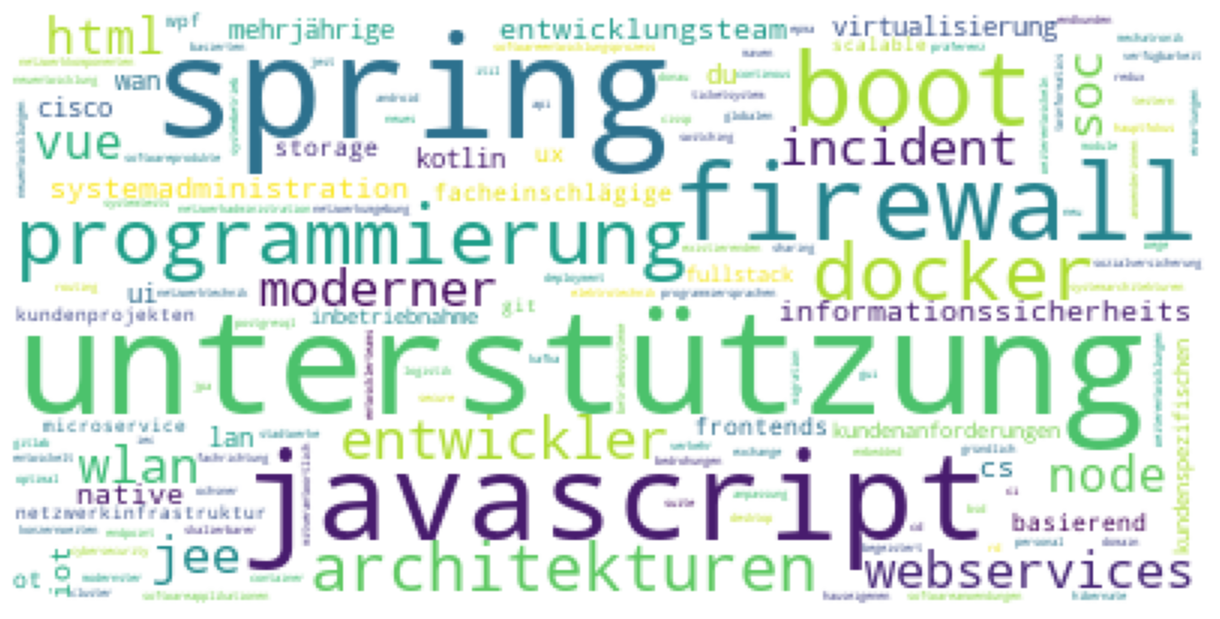

In [35]:
plt.figure(figsize = (12,12), facecolor = None)
plt.imshow(word_cloud)
plt.axis("off")
plt.tight_layout(pad = 0)

In [36]:
tokenizer = nltk.tokenize.RegexpTokenizer('w+')
#Tokenizing the text
tokens = nltk.word_tokenize(NewCleanedText)
#tokens = tokenizer.tokenize(corpus)
len(NewCleanedText)

38172

In [37]:
freq_dist = nltk.FreqDist(tokens)
mostcommon = freq_dist.most_common(1000)
mostcommon

[('unterstützung', 31),
 ('spring', 30),
 ('javascript', 21),
 ('firewall', 16),
 ('boot', 14),
 ('programmierung', 12),
 ('docker', 12),
 ('architekturen', 12),
 ('entwickler', 12),
 ('jee', 10),
 ('wlan', 10),
 ('webservices', 10),
 ('moderner', 10),
 ('incident', 10),
 ('soc', 9),
 ('vue', 9),
 ('html', 9),
 ('node', 9),
 ('systemadministration', 8),
 ('native', 8),
 ('entwicklungsteam', 8),
 ('informationssicherheits', 8),
 ('cs', 8),
 ('iot', 8),
 ('cisco', 7),
 ('lan', 7),
 ('wan', 7),
 ('mehrjährige', 7),
 ('…du', 7),
 ('ui', 7),
 ('virtualisierung', 7),
 ('kotlin', 7),
 ('ot', 6),
 ('storage', 6),
 ('facheinschlägige', 6),
 ('basierend', 6),
 ('ux', 6),
 ('frontends', 6),
 ('kundenanforderungen', 6),
 ('fullstack', 6),
 ('inbetriebnahme', 6),
 ('kundenspezifischen', 6),
 ('git', 5),
 ('microservice', 5),
 ('netzwerkinfrastruktur', 5),
 ('wpf', 5),
 ('kundenprojekten', 5),
 ('scalable', 5),
 ('softwareapplikationen', 5),
 ('deployment', 5),
 ('api', 5),
 ('globalen', 5),
 ('elek

In [38]:
import pandas as pd

# Sample sentence
sentence = NewCleanedText

# Split the sentence into words
words = sentence.split()

# Calculate the number of rows required
num_rows = (len(words) + 199) // 200

# Create a DataFrame with the required number of rows
df_Words = pd.DataFrame({'Words': ['']*num_rows})

# Populate each row of the DataFrame with up to 200 words
for i in range(num_rows):
    start_index = i * 200
    end_index = min((i+1) * 200, len(words))
    df_Words.iloc[i] = ' '.join(words[start_index:end_index])

# Print the resulting DataFrame
print(df_Words)

                                                Words
0   programmierung neueste technologietrends ständ...
1   vertraulichkeit verfügbarkeit geschäftsprozess...
2   versorgungssicherheit folgender informationssi...
3   maßgeblicher arbeitspakete entwickler vereinsi...
4   jee spring qualitätsanspruch ergebnisorientier...
5   arbeitszeit bereichwir handelsunternehmens fix...
6   softwareapplikationen jdbc apache tomcat sprin...
7   bewegt post moderner architectur native entwic...
8   konsistente bereitzustellen erfolgen funktions...
9   ankommt elektrifizieren automatisieren mobilit...
10  epkn neuausstattung sd wan infrastrukturbetreu...
11  softwareweiterentwicklung produktionsbereich j...
12  share learned crafting teammate faster activem...
13  playing …du filialsysteme kassensysteme nachsy...
14  sankt florian innget mono repos terraform micr...


In [39]:
df_Words.to_csv("Cleaned_words_itmeta.csv", index= False) 